# Simulate Unbalanced Distribution

In [1]:
import imp
import random
import CustomDataset
import CustomModels
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from CustomDataset import dataset_partition

In [2]:
names = ["linear_unbalanced_1", 
         "linear_unbalanced_2", 
         "balanced", 
         "balanced_5000", 
         "balanced_1600", 
         "balanced_800", 
         "balanced_400", 
         "balanced_200",
         "balanced_100", 
         "balanced_50", 
         "balanced_25", 
         "balanced_10", 
         "balanced_5", 
         "expo_unbalance", 
         "expo_unbalance_2560to5", 
         "expo_unbalance_5000to1",
         "cut_unbalance_4890or25", 
         "linear_unbalance_1020to3", 
         "balanced_2560"]
shapes = [list(range(5000,0,-500)), 
          list(range(4100, 1100, -300)), 
          [2750]*10,
          [5000]*10,
          [1600]*10,
          [800]*10,
          [400]*10,
          [200]*10,
          [100]*10,
          [50]*10,
          [25]*10,
          [10]*10,
          [5]*10,
          [5000, 4287, 3673, 3148, 2699, 2312, 1982, 1699, 1454, 1246],
          [2560, 1280, 640, 320, 160, 80, 40, 20, 10, 5],
          [5000, 2000, 800, 320, 128, 51, 20, 8, 3, 1],
          [4890, 25, 25, 25, 25, 25, 25, 25, 25, 25],
          [1020, 907, 794, 681, 568, 455, 342, 229, 116, 3],
          [2560]*10]

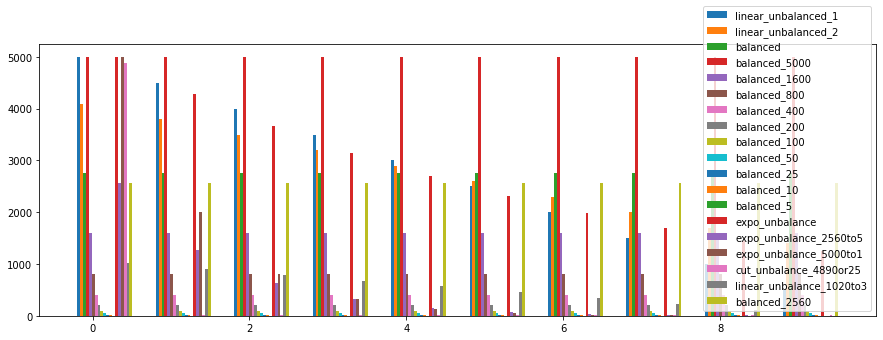

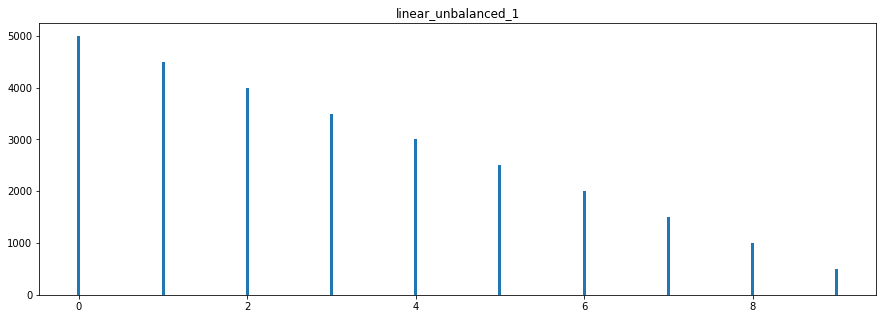

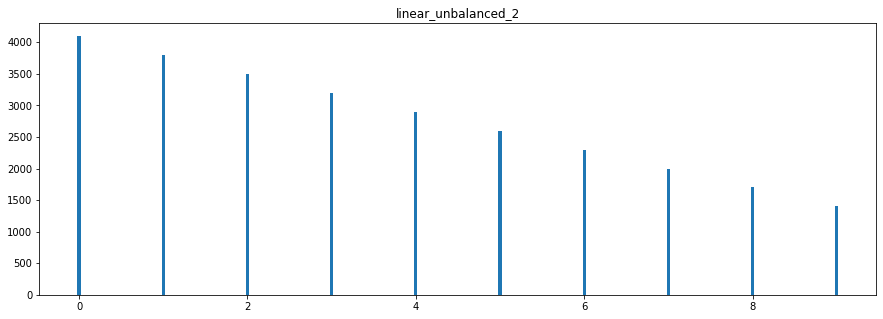

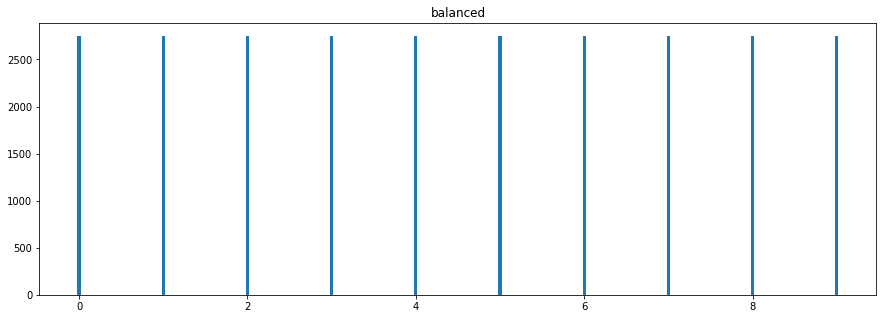

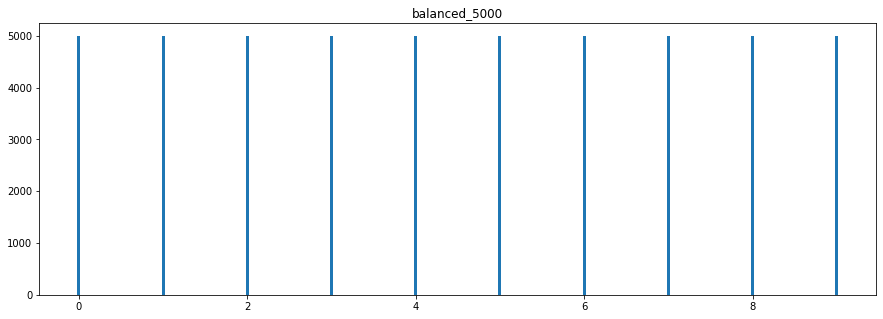

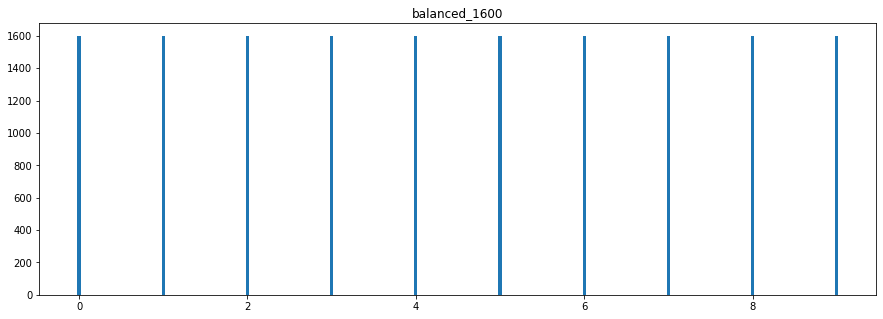

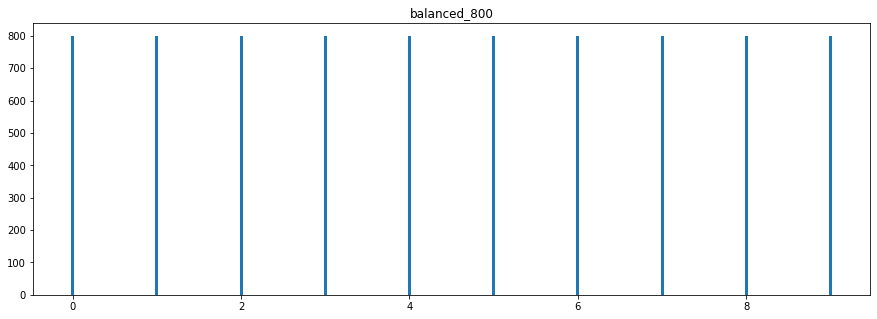

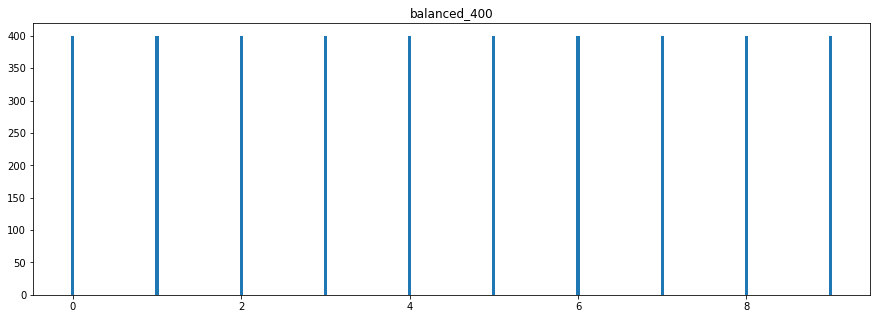

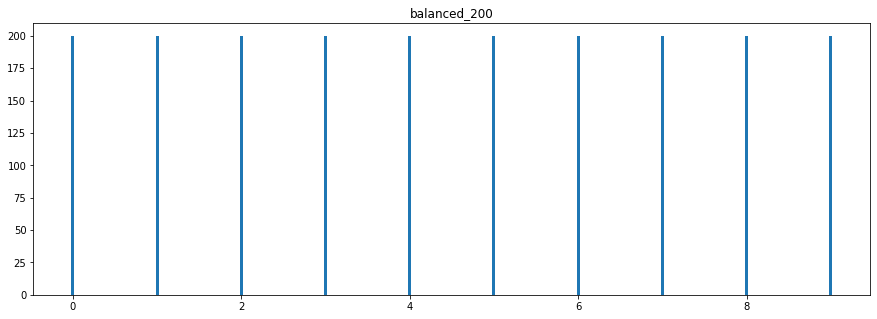

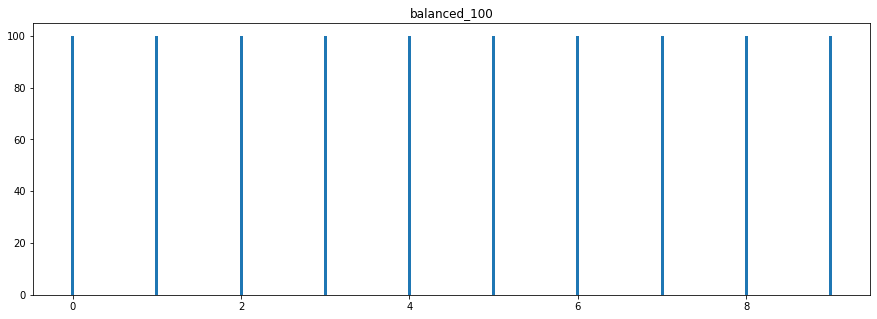

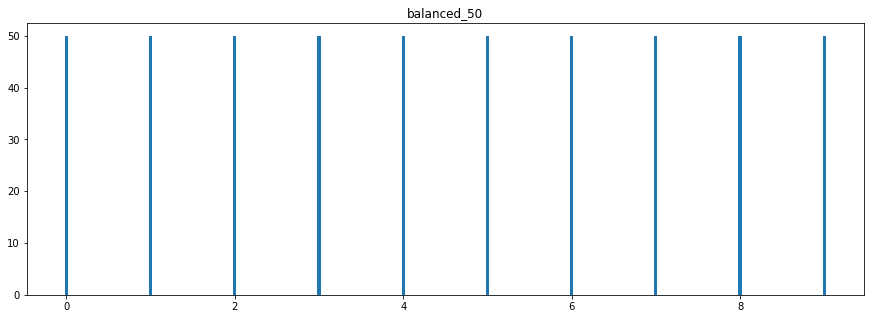

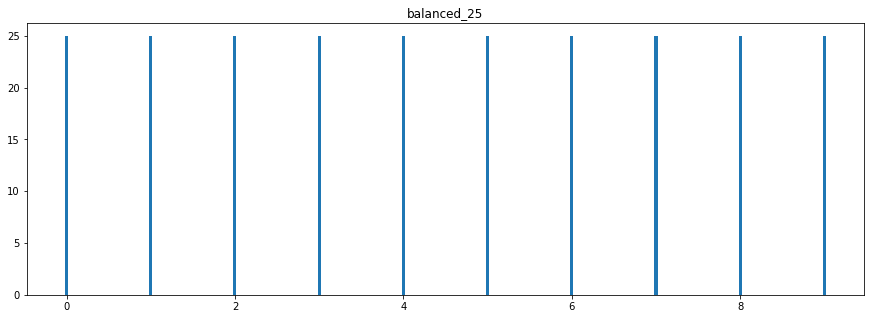

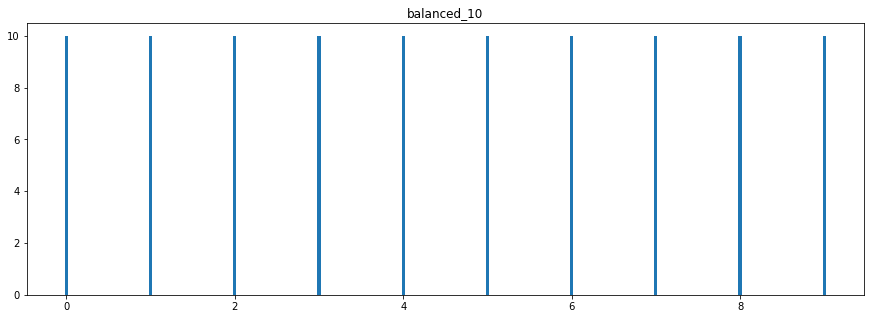

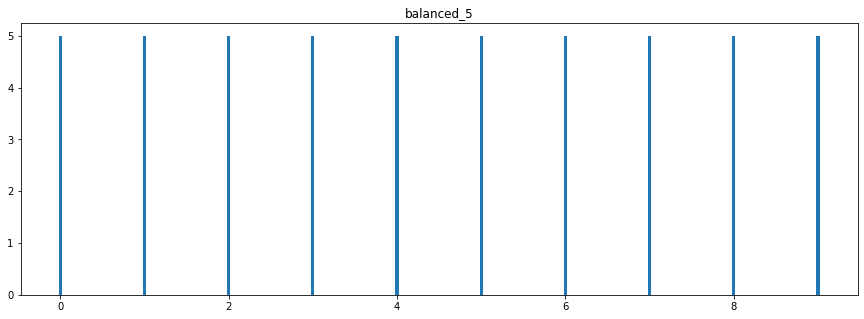

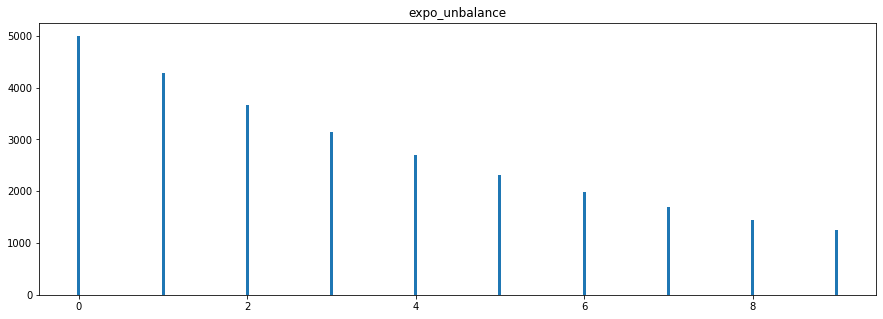

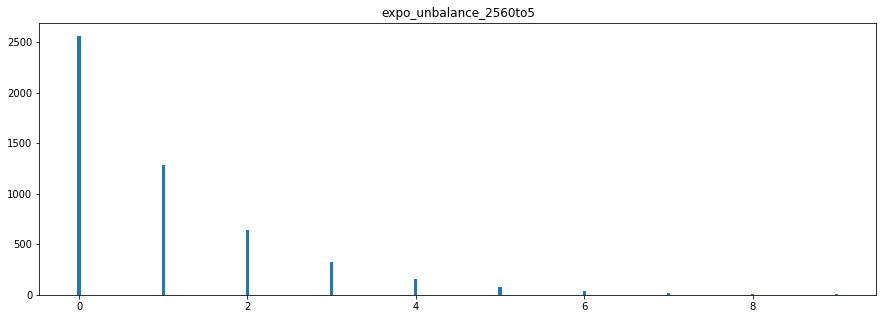

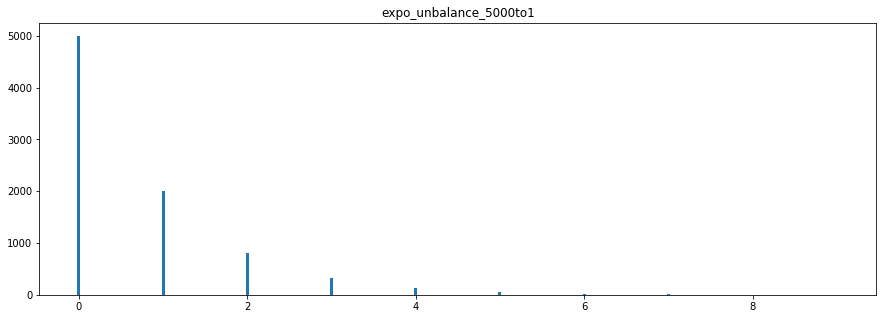

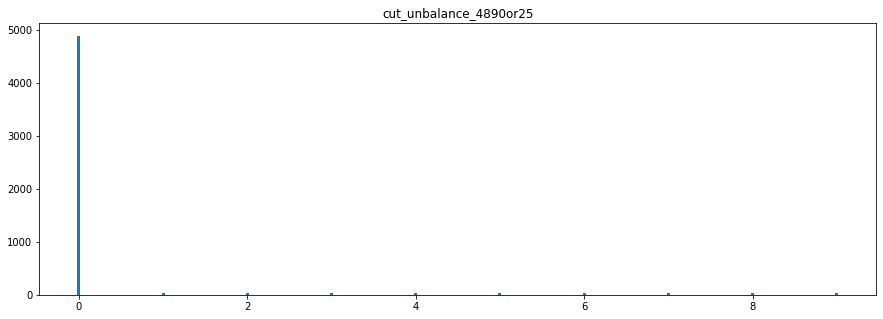

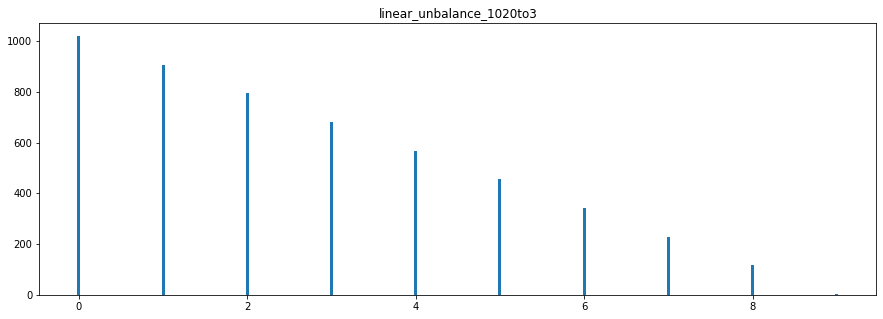

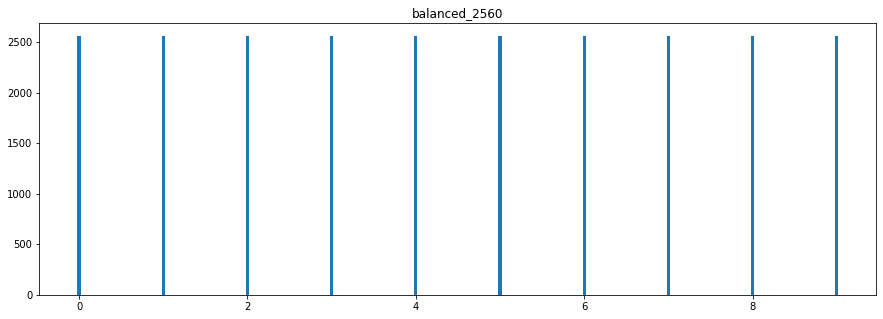

In [4]:
# new distributions

width = 0.7 / len(shapes)
x = np.arange(10) - len(shapes) * width / 4
i = 0

fig, ax = plt.subplots(figsize=(15, 5))
for shape in shapes:
    ax.bar(x + i*width, shape, width, label=names[i])
    i = i + 1
ax.legend()

i = 0
for shape in shapes:
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.bar(np.arange(10), shape, width)
    ax.set_title(names[i])
    i = i + 1


In [5]:
# get a random permutation for targets
permutation = np.array([9, 2, 3, 4, 7, 5, 0, 6, 8, 1])
np.array(list(range(5000,0,-500)))[permutation]

array([ 500, 4000, 3500, 3000, 1500, 2500, 5000, 2000, 1000, 4500])

In [6]:
# MNIST
MNIST = datasets.MNIST('./data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ]))

In [7]:
# CIFAF10 
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))])

CIFAR10 = datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

Files already downloaded and verified


In [8]:
# get indexs for each targets
MNIST_idx_dic = CustomDataset.produce_idx_dic(MNIST.targets)
CIFAR10_idx_dic = CustomDataset.produce_idx_dic(CIFAR10.targets)

In [9]:
# randomly select index and store as a npy file
randomState = np.random.RandomState(np.random.seed(12345))
for i in range(len(names)-1, len(names)):
    distribution = np.array(shapes[i])[permutation]
    MNIST_new_idx = CustomDataset.random_select(MNIST_idx_dic, distribution, randomState)
    CIFAR10_new_idx = CustomDataset.random_select(CIFAR10_idx_dic, distribution, randomState)
    
    np.save("./data/MNIST_"+names[i], MNIST_new_idx)
    np.save("./data/CIFAR10_"+names[i], CIFAR10_new_idx)
    

In [ ]:
# TODO: duplicate samples in expo_unbalance_2560to5 make it have the same size as balance_2560, compare with balance_2560

In [6]:
Dataset = 'MNIST'
Original_Distribution = 'expo_unbalance_2560to5'
Rescaled_Distribution = '2560to5_rescaled'
Rescaled_Number = 2560

In [5]:
randomState = np.random.RandomState(np.random.seed(12345))
target_dataset = CustomDataset.load_dataset(dataset_name=Dataset, distribution_name=Original_Distribution, transform = None, data_folder="./data")
target_idx_dic = CustomDataset.produce_idx_dic(target_dataset.targets)
result_idxs = CustomDataset.duplicate_idxs(target_idx_dic, Rescaled_Number, randomState=randomState)
np.save("./data/"+Dataset+"_"+Rescaled_Distribution, np.load("./data/"+Dataset+"_"+Original_Distribution+".npy")[result_idxs])

NameError: name 'Dataset' is not defined

In [16]:
#test
test = CustomDataset.CustomMNIST("./data", 
                                 indexs_name="MNIST_2560to5_rescaled.npy")
dic = CustomDataset.produce_idx_dic(test.targets)

0
5
1
640
2
320
3
160
4
20
5
80
6
2560
7
40
8
10
9
1280


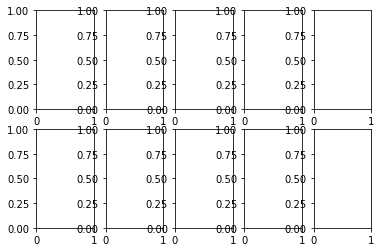

In [17]:
fig = plt.figure()
for (k,v) in dic.items():
    plt.subplot(2,5,k+1)
    print(k)
    print(len(v))
    #plt.imshow(test[v[10]][0][0,:,:], cmap='gray', interpolation='none')

In [ ]:
# Produce targrt transform and index transform on datasets use by the hierarchical method

In [23]:
# target dataset MNIST_expo_unbalance_2560to5
Dataset = 'MNIST'
Distribution = 'expo_unbalance_2560to5'
randomState = np.random.RandomState(np.random.seed(12345))
target_dataset = CustomDataset.load_dataset(dataset_name=Dataset, distribution_name=Distribution, transform = None, data_folder="./data")
target_idx_dic = CustomDataset.produce_idx_dic(target_dataset.targets)
origin_indexs = np.load("./data/"+Dataset+"_"+Distribution +".npy")

In [24]:
origin_indexs

array([   13,    14,    19, ..., 59983, 59986, 59998])

In [15]:
target_idx_dic[0]

[414, 1748, 2611, 3507, 3853]

In [27]:
# using binary splits on the targets
dtype = [('key', int), ('size', int)]
sizes = np.array([(0,0)]*len(target_idx_dic.keys()), dtype)
total_size = 0

for (k,v) in target_idx_dic.items():
    sizes[k] = (k,len(v))
    total_size = total_size + len(v)

sizes[::-1].sort(order='size')

def recursive_partition(sizes, total_size):
    if (len(sizes) == 1):
        return sizes[0]
    
    class_one_size = 0
    index = 0
    while class_one_size < total_size/2:
        class_one_size = class_one_size + sizes[index][1]
        index = index+1
    return [
        recursive_partition(sizes[0:index], class_one_size), 
        recursive_partition(sizes[index:], total_size-class_one_size)
    ]

In [28]:
class_partition = recursive_partition(sizes, total_size)

In [6]:
isinstance(class_partition, list)

True

In [7]:
# TODO: build levels of classifers and datasets based on the given hierarchical structure

In [33]:

class dataset_partition():
    def __init__(self, **kwargs):
        self.idxs = kwargs.get("idxs")
        if self.idxs is None:
            raise ValueError("wrong arguments")
        
        old_class_number = kwargs.get("old_class_number")
        if old_class_number is not None:
            self.old_class_number = old_class_number
            self.has_children = False
        else:
            self.classes = kwargs.get("classes")
            self.has_children = True
            self.children = kwargs.get("children")
            if (self.classes is None) or (self.children is None):
                raise ValueError("wrong arguments")
        

def build_datasets_partition(target_idx_dic, class_partition, origin_indexs):
    # dataset_partition : (idxs, classes, children) | (idxs, old_class_number)
    # children : [dataset_partition, dataset_partition]
    # this function will return an dataset_partition build from the root of class_partition
    
    idxs = []
    classes = np.array([-1]*10)
    children = []
    class_number = 0
    for child_class_partition in class_partition:
        if isinstance(child_class_partition, list):
            # build child partition for the classes
            child_dataset_partition = build_datasets_partition(target_idx_dic, child_class_partition, origin_indexs)
            children.append(child_dataset_partition)
            # all idxs of child partition will be part of the idxs of current partition
            idxs = idxs + child_dataset_partition.idxs[:]
            # all classes in the child partition will be merged into single class of current partition
            classes[child_dataset_partition.classes!=-1] = class_number
        else:
            # no child partition, single class
            old_class_number = child_class_partition[0]
            children.append(
                dataset_partition(
                    idxs = origin_indexs[target_idx_dic[old_class_number]], 
                    old_class_number = old_class_number
                )
            )
            idxs = idxs + list(children[-1].idxs[:])
            classes[old_class_number] = class_number
        class_number = class_number+1
    
    np.sort(idxs)
    return dataset_partition(idxs=idxs, classes=classes, children=children)

def check_dataset_partition(target_idx_dic, partition):
    classes = np.array([0,1,2,3,4,5,6,7,8,9])
    frontier = partition.children[:]
    while len(frontier) != 0:
        item = frontier.pop(0)
        if (not item.has_children):
            print(item.old_class_number)
            print("Number: " +str(len(item.idxs)))
        else:
            frontier = frontier+item.children[:]
            temp = classes[item.classes!=-1]
            print(temp)
            print("Number: " + str(len(item.idxs)))
    
    

In [34]:
a = build_datasets_partition(target_idx_dic, class_partition, origin_indexs)

In [35]:
check_dataset_partition(target_idx_dic, a)

6
Number: 2560
[0 1 2 3 4 5 7 8 9]
Number: 2555
9
Number: 1280
[0 1 2 3 4 5 7 8]
Number: 1275
1
Number: 640
[0 2 3 4 5 7 8]
Number: 635
2
Number: 320
[0 3 4 5 7 8]
Number: 315
3
Number: 160
[0 4 5 7 8]
Number: 155
5
Number: 80
[0 4 7 8]
Number: 75
7
Number: 40
[0 4 8]
Number: 35
4
Number: 20
[0 8]
Number: 15
8
Number: 10
0
Number: 5


In [36]:
a.classes

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [37]:
import pickle 
filehandler = open('./data/partition_object_test.txt', 'wb') 
pickle.dump(a, filehandler)

In [3]:
import pickle 
filehandler = open('./data/partition_object_test.txt', 'rb') 
a_2 = pickle.load(filehandler)

In [39]:
check_dataset_partition(target_idx_dic, a_2)

6
Number: 2560
[0 1 2 3 4 5 7 8 9]
Number: 2555
9
Number: 1280
[0 1 2 3 4 5 7 8]
Number: 1275
1
Number: 640
[0 2 3 4 5 7 8]
Number: 635
2
Number: 320
[0 3 4 5 7 8]
Number: 315
3
Number: 160
[0 4 5 7 8]
Number: 155
5
Number: 80
[0 4 7 8]
Number: 75
7
Number: 40
[0 4 8]
Number: 35
4
Number: 20
[0 8]
Number: 15
8
Number: 10
0
Number: 5


In [12]:
# finished

In [6]:
np.array([-1,1,1])[True]

array([[-1,  1,  1]])

In [1]:
"\n".join(str(item) for item in [1,1,1,1])

'1\n1\n1\n1'

In [45]:
m = CustomModels.load_model('Custom_05', 1,  2)
target_dataset = datasets.MNIST('./data', train=False, download=True,
                                transform=transforms.Compose([
                            transforms.Pad(2, fill=0, padding_mode='constant'),
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ]))

In [46]:
loader= torch.utils.data.DataLoader(target_dataset, batch_size=10, shuffle=True, num_workers=4)

In [32]:
pic = (target_dataset[0][0])
tensor = transforms.ToTensor()(pic)
tensor.unsqueeze_(0)

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]])

In [48]:
a = loader.__iter__().next()

In [72]:
a[0].shape[0]

10

In [33]:
tensor.shape

torch.Size([1, 1, 32, 32])

In [58]:
result = m(a[0])

In [74]:
result.data[:,0]

tensor([-0.7331, -0.6521, -0.4208, -0.5569, -0.6298, -1.0289, -1.0347, -0.4753,
        -0.6981, -0.7299])

In [73]:
np.exp(result.data.numpy())

array([[0.48041195, 0.519588  ],
       [0.52097166, 0.47902843],
       [0.6565223 , 0.34347776],
       [0.5729933 , 0.42700675],
       [0.53271914, 0.46728086],
       [0.357414  , 0.642586  ],
       [0.35531732, 0.64468265],
       [0.62169015, 0.37830985],
       [0.49755234, 0.50244766],
       [0.48194927, 0.51805073]], dtype=float32)

10

In [76]:
torch.tensor([1])

tensor([1])

In [77]:
a = 1
a += 1

In [78]:
a

2

In [91]:
a = np.zeros((10,10))
a[:, np.array([1,1,1,0,0,0,1,1,1,0]) == 1] += result.data[:,0].numpy().reshape((10,1))

In [92]:
a

array([[-0.73311132, -0.73311132, -0.73311132,  0.        ,  0.        ,
         0.        , -0.73311132, -0.73311132, -0.73311132,  0.        ],
       [-0.65205967, -0.65205967, -0.65205967,  0.        ,  0.        ,
         0.        , -0.65205967, -0.65205967, -0.65205967,  0.        ],
       [-0.42079869, -0.42079869, -0.42079869,  0.        ,  0.        ,
         0.        , -0.42079869, -0.42079869, -0.42079869,  0.        ],
       [-0.55688125, -0.55688125, -0.55688125,  0.        ,  0.        ,
         0.        , -0.55688125, -0.55688125, -0.55688125,  0.        ],
       [-0.62976092, -0.62976092, -0.62976092,  0.        ,  0.        ,
         0.        , -0.62976092, -0.62976092, -0.62976092,  0.        ],
       [-1.02886045, -1.02886045, -1.02886045,  0.        ,  0.        ,
         0.        , -1.02886045, -1.02886045, -1.02886045,  0.        ],
       [-1.03474402, -1.03474402, -1.03474402,  0.        ,  0.        ,
         0.        , -1.03474402, -1.03474402

In [87]:
result.data[:,0].reshape((10,1))

tensor([[-0.7331],
        [-0.6521],
        [-0.4208],
        [-0.5569],
        [-0.6298],
        [-1.0289],
        [-1.0347],
        [-0.4753],
        [-0.6981],
        [-0.7299]])